# Exercises

#### hint 
 - you can feed more than one value into a cdf or a ppf
 - use a list formate [low_val, high_val]
 - ex: some_distribution.cdf([4,7])

Do your work for this exercise in either a python script named probability_distributions.py or a jupyter notebook named probability_distributions.ipynb.

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<AxesSubplot:>

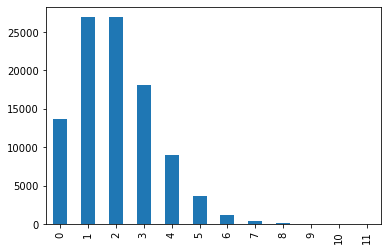

In [66]:
#Experimental
poisson_exp = pd.Series(stats.poisson(2).rvs(100_000))
poisson_exp.value_counts().sort_index().plot(kind='bar')
#plt.bar(x=range((poisson_exp.max() + 1)), height=)

<BarContainer object of 10 artists>

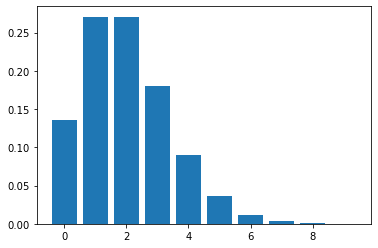

In [67]:
#Theoretical
x = np.arange(0, 10)
y = stats.poisson(2).pmf(x)
plt.bar(x,y)

### 1a. What is the probability that no cars drive up in the noon hour?

In [68]:
#theoretical
stats.poisson(2).pmf(0)

0.1353352832366127

In [69]:
#experimental --> use normalize in order to create the series with relative frequencies (percentage) of each outcome. 
poisson_exp.value_counts(normalize=True).loc[0]

0.13688

### 1b. What is the probability that 3 or more cars come through the drive through?

In [70]:
#theoretical --> 3 or more indicates survival function
stats.poisson(2).sf(2)

0.32332358381693654

In [71]:
#experimental
poisson_exp.value_counts(normalize=True).sort_index().iloc[3:].sum()

0.32454000000000005

### 1c. How likely is it that the drive through gets at least 1 car?

In [72]:
#theoretical
stats.poisson(2).sf(0)

0.8646647167633873

In [73]:
#experimental 
poisson_exp.value_counts(normalize=True).sort_index().iloc[1:].sum()

0.8631200000000001

## Question 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of 0.3. 
### 2a. Calculate the following:

In [74]:
μ = 3.0
σ = .3
grad_dist = stats.norm(μ, σ)

In [75]:
grad_list = grad_dist.rvs(100_000)

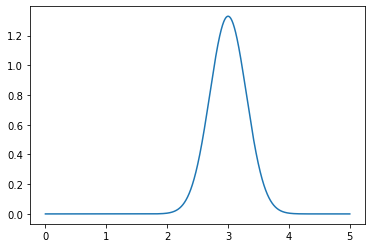

In [76]:
#theoretical
x = np.arange(0, 5, .001)
plt.plot(x, stats.norm.pdf(x, μ, σ))

### 2b. What grade point average is required to be in the top 5% of the graduating class?

In [77]:
#experimental
np.quantile(grad_list, q=.95)

3.4929747876792

In [78]:
#theoretical
grad_dist.isf(.05)

3.4934560880854417

### 2c. What GPA constitutes the bottom 15% of the class?

In [79]:
#theoretical
grad_dist.ppf(.15)

2.689069983151863

In [80]:
#experimental 
np.quantile(grad_list, q=.15)

2.6895223807930746

### 2d. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [81]:
#experimental
np.quantile(grad_list, q=(.20, .30))

array([2.74794531, 2.84483801])

In [82]:
#theoretical
grad_dist.ppf([.20, .30])

array([2.74751363, 2.84267985])

### 2e. If I have a GPA of 3.5, what percentile am I in?

In [83]:
#experimental
stats.percentileofscore(grad_list, 3.5)

95.259

In [84]:
#theoretical
grad_dist.cdf(3.5)

0.9522096477271853

## 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [85]:
#click through or not --> binomial
#n_trials = visitors
visitors = 4326
#succes rate (prop) = .02
clicks = .02

In [116]:
#experimental
click_exp = stats.binom(visitors, clicks).rvs(100_000)
(len(click_exp[click_exp > 96]))/len(click_exp)

0.13831

In [85]:
#theoretical
stats.binom(visitors, clicks).sf(96)

0.13975823631416448

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question. What is the probability that at least one of your first 60 answers is correct?

In [88]:
#correct or not --> binomial
#trials --> 60 questions --> 60 trials
questions = 60
#success rate --> .01
guess_prob = .01

In [89]:
#experimental
guess_exp = stats.binom(questions, guess_prob).rvs(100_000)
len(guess_exp[guess_exp > 0]) / len(guess_exp)

0.45272

In [90]:
#theoretical
stats.binom(questions, guess_prob).sf(0)

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

### 5a. How likely is it that the break area gets cleaned up each day?

In [91]:
#clean or not clean --> binomial
#students using break area --> trials --> .90 * 66 --> 59.4 --> round down to 59
#cleaning up --> success rate --> .03
cleaning = stats.binom(59, .03)

In [92]:
#experimental
cleaning_exp = cleaning.rvs(100_000)
len(cleaning_exp[cleaning_exp >0]) / len(cleaning_exp)
(cleaning_exp > 0).mean()

0.83503

In [93]:
#theoretical
cleaning.sf(0)

0.8342199288437352

### 5b. How likely is it that it goes two days without getting cleaned up? 

In [94]:
#clean or not clean --> binomial
#trials --> .90 * 66 
#success rate --> .03


In [95]:
#experimental
two_day_exp = stats.binom(118, .03).rvs((1_000_000, 2))

days_no_clean = (two_day_exp == 0).sum(axis=1)

(days_no_clean > 0).mean()

0.05445

In [96]:
#theoretical
stats.binom(118, .03).pmf(0)

0.027483031992576134

### 5c. All week?

In [97]:
#clean or not clean --> binomial
#trials --> .90 * (66 * 5) 
#success rate --> .03

In [98]:
#experimental
five_days = stats.binom(297, .03).rvs((1_000_000, 2))

five_days_no_clean = (five_days == 0).sum(axis=1)

(five_days_no_clean > 0).mean()

0.000261

In [99]:
#theoretical
stats.binom(297, .03).pmf(0)

0.00011781621791055051

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [100]:
μ = 15 # --> 15 * 2 = 30 minutes --> + (10 + 2 [for your own order]) = 42 --> whats the number that gets us to 45 --> 16.5 
σ = 3

In [101]:
#experimental
lunch_exp = stats.norm(μ, σ).rvs(100_000)

(lunch_exp < 16.5).mean()

0.69344

In [102]:
#theoretical
stats.norm(μ, σ).cdf(16.5)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [103]:
from env import host, user, password

In [104]:
emp_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [105]:
emp_sql = """
SELECT*
FROM employees
JOIN salaries USING (emp_no)
WHERE salaries.to_date > now()
"""

In [106]:
emp_df = pd.read_sql(emp_sql, emp_url)

emp_df = pd.DataFrame(emp_df)

emp_df_copy = emp_df

μ = emp_df['salary'].mean()

σ = emp_df['salary'].std()

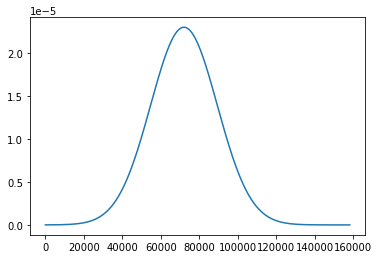

In [107]:
salary_dist = stats.norm(μ , σ)
x = np.arange(0, emp_df['salary'].max() + 1)
y = salary_dist.pdf(x)
plt.plot(x,y)

### 7a. What percent of employees earn less than 60,000?

In [108]:
#with modeling
salary_dist.cdf(59_999)

0.2438393099761686

In [109]:
#with analysis
salaries = emp_df['salary']

(salaries < 60_000).mean()

0.2705727041028802

### 7b. What percent of employees earn more than 95,000?

In [110]:
#with modeling
salary_dist.sf(95_000)

0.09208819199804053

In [111]:
#with analysis
(salaries < 95_000).mean()

0.8913686262097916

### 7c. What percent of employees earn between 65,000 and 80,000?

In [112]:
#with modeling
zone = salary_dist.cdf([65_000, 80_000])
zone = zone[1] - zone[0]
zone

0.3350605685446666

In [113]:
#with analysis
(salaries.between(65_000, 80_000)).mean()

0.32515700221552196

### 7d. What do the top 5% of employees make?

In [114]:
#with modeling
salary_dist.isf(.05)

100484.64454102777

In [115]:
#with analysis
salaries.quantile(q=.95)

104225.84999999998